# Function Initialization, Data Preparation

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
data=pd.read_csv('/content/game_data_teams_regular_season_and_playoffs_2003_2020.csv') 
data.drop('Unnamed: 0', inplace=True, axis=1)

In [2]:
unfinished_season=data.loc[data['SEASON']==2020]
data=data.drop(index=unfinished_season.index)
unfinished_season=data.loc[data['SEASON']==2019]
data=data.drop(index=unfinished_season.index)

In [4]:
import matplotlib.pyplot as plt

In [41]:
data[['H_S_ELO','H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_TS','H_S_WP','H_S_WL','H_S_FG3_PCT','H_S_FTR',
               'H_L5_PTS','H_L5_PTS_A','H_L5_NET_RATING',
               'A_S_ELO','A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_TS','A_S_WP','A_S_WL','A_S_FG3_PCT','A_S_FTR',
               'A_L5_PTS','A_L5_PTS_A','A_L5_NET_RATING']]

,H_S_ELO,H_S_NET_RATING,H_S_PTS,H_S_PTS_A,H_S_AST,H_S_TS,H_S_WP,H_S_WL,H_S_FG3_PCT,H_S_FTR,...,A_S_PTS_A,A_S_AST,A_S_TS,A_S_WP,A_S_WL,A_S_FG3_PCT,A_S_FTR,A_L5_PTS,A_L5_PTS_A,A_L5_NET_RATING
2000,1701,7.719512,105.353659,97.634146,25.170732,0.570873,0.753086,41,0.397098,0.239918,...,97.439024,22.524390,0.590061,0.666667,35,0.364159,0.300383,97.6,103.2,-5.6
2001,1592,4.756098,102.195122,97.439024,22.524390,0.590061,0.666667,27,0.364159,0.300383,...,97.634146,25.170732,0.570873,0.753086,33,0.397098,0.239918,109.2,96.2,13.0
2002,1612,4.756098,102.195122,97.439024,22.524390,0.590061,0.666667,27,0.364159,0.300383,...,97.634146,25.170732,0.570873,0.753086,33,0.397098,0.239918,105.4,98.8,6.6
2003,1684,7.719512,105.353659,97.634146,25.170732,0.570873,0.765432,43,0.397098,0.239918,...,97.439024,22.524390,0.590061,0.654321,33,0.364159,0.300383,100.6,94.4,6.2
2004,1673,7.719512,105.353659,97.634146,25.170732,0.570873,0.753086,41,0.397098,0.239918,...,97.439024,22.524390,0.590061,0.666667,35,0.364159,0.300383,99.0,89.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22733,1487,-18.000000,77.000000,95.000000,13.000000,0.412206,0.000000,-1,0.167000,0.448718,...,89.000000,23.000000,0.548200,1.000000,1,0.379000,0.252874,106.0,89.0,17.0
22734,1340,-19.000000,94.500000,113.500000,18.000000,0.489232,0.000000,-2,0.304000,0.387879,...,90.000000,17.000000,0.474490,1.000000,-2,0.233000,0.287356,93.0,90.0,3.0
22735,1327,-17.000000,84.000000,101.000000,17.000000,0.450450,0.000000,-1,0.364000,0.250000,...,107.000000,20.000000,0.555166,0.000000,-2,0.316000,0.320000,95.0,107.0,-12.0
22736,1494,-4.000000,101.000000,105.000000,20.000000,0.525385,0.000000,-1,0.500000,0.267442,...,89.000000,15.000000,0.427674,0.000000,0,0.231000,0.226190,79.0,89.0,-10.0


In [42]:
data[['H_S_ELO','H_S_WP','H_S_WL','H_S_NET_RATING','H_S_TS','H_S_TS_A','H_S_EFG','H_S_EFG_A','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_REB','H_S_AST_A','H_S_REB_A','H_S_FTR',
             'A_S_ELO','A_S_WP','A_S_WL','A_S_NET_RATING','A_S_TS','A_S_TS_A','A_S_EFG','A_S_EFG_A','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_REB','A_S_AST_A','A_S_REB_A','A_S_FTR']]

,H_S_ELO,H_S_WP,H_S_WL,H_S_NET_RATING,H_S_TS,H_S_TS_A,H_S_EFG,H_S_EFG_A,H_S_PTS,H_S_PTS_A,...,A_S_TS_A,A_S_EFG,A_S_EFG_A,A_S_PTS,A_S_PTS_A,A_S_AST,A_S_REB,A_S_AST_A,A_S_REB_A,A_S_FTR
2000,1701,0.753086,41,7.719512,0.570873,0.518521,0.536967,0.481723,105.353659,97.634146,...,0.548682,0.553970,0.510888,102.195122,97.439024,22.524390,36.878049,21.353659,40.317073,0.300383
2001,1592,0.666667,27,4.756098,0.590061,0.548682,0.553970,0.510888,102.195122,97.439024,...,0.518521,0.536967,0.481723,105.353659,97.634146,25.170732,43.268293,20.353659,42.219512,0.239918
2002,1612,0.666667,27,4.756098,0.590061,0.548682,0.553970,0.510888,102.195122,97.439024,...,0.518521,0.536967,0.481723,105.353659,97.634146,25.170732,43.268293,20.353659,42.219512,0.239918
2003,1684,0.765432,43,7.719512,0.570873,0.518521,0.536967,0.481723,105.353659,97.634146,...,0.548682,0.553970,0.510888,102.195122,97.439024,22.524390,36.878049,21.353659,40.317073,0.300383
2004,1673,0.753086,41,7.719512,0.570873,0.518521,0.536967,0.481723,105.353659,97.634146,...,0.548682,0.553970,0.510888,102.195122,97.439024,22.524390,36.878049,21.353659,40.317073,0.300383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22733,1487,0.000000,-1,-18.000000,0.412206,0.533229,0.326923,0.480000,77.000000,95.000000,...,0.481393,0.511494,0.419753,106.000000,89.000000,23.000000,42.000000,19.000000,43.000000,0.252874
22734,1340,0.000000,-2,-19.000000,0.489232,0.613779,0.415152,0.580645,94.500000,113.500000,...,0.562781,0.431034,0.476923,93.000000,90.000000,17.000000,33.000000,23.000000,47.000000,0.287356
22735,1327,0.000000,-1,-17.000000,0.450450,0.440509,0.404762,0.425743,84.000000,101.000000,...,0.587138,0.520000,0.537037,95.000000,107.000000,20.000000,36.000000,20.000000,44.000000,0.320000
22736,1494,0.000000,-1,-4.000000,0.525385,0.578194,0.488372,0.548780,101.000000,105.000000,...,0.451135,0.404762,0.388235,79.000000,89.000000,15.000000,45.000000,17.000000,51.000000,0.226190


In [43]:
data[['H_L5_WP','H_L5_NET_RATING','H_L5_TS','H_L5_TS_A','H_L5_PTS','H_L5_PTS_A','H_L5_AST','H_L5_REB','H_L5_AST_A',
              'A_L5_WP','A_L5_NET_RATING','A_L5_TS','A_L5_TS_A','A_L5_PTS','A_L5_PTS_A','A_L5_AST','A_L5_REB','A_L5_AST_A']]

,H_L5_WP,H_L5_NET_RATING,H_L5_TS,H_L5_TS_A,H_L5_PTS,H_L5_PTS_A,H_L5_AST,H_L5_REB,H_L5_AST_A,A_L5_WP,A_L5_NET_RATING,A_L5_TS,A_L5_TS_A,A_L5_PTS,A_L5_PTS_A,A_L5_AST,A_L5_REB,A_L5_AST_A
2000,0.8,11.6,0.613947,0.581565,107.2,95.6,24.4,39.6,16.2,0.4,-5.6,0.610488,0.633720,97.6,103.2,17.2,31.4,23.2
2001,0.4,-2.0,0.617470,0.606573,98.4,100.4,19.0,33.6,20.8,0.8,13.0,0.613869,0.571313,109.2,96.2,24.0,40.4,17.4
2002,0.4,4.2,0.612494,0.580637,100.4,96.2,18.8,35.2,20.2,0.8,6.6,0.573674,0.563875,105.4,98.8,23.2,42.8,18.4
2003,0.8,5.2,0.565844,0.553546,105.6,100.4,22.4,42.6,18.6,0.4,6.2,0.617390,0.590886,100.6,94.4,19.0,33.4,18.4
2004,0.8,9.2,0.550936,0.521552,106.0,96.8,21.8,45.4,19.0,0.4,10.0,0.619617,0.544916,99.0,89.0,19.6,35.2,16.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22733,0.0,-18.0,0.412206,0.533229,77.0,95.0,13.0,50.0,21.0,1.0,17.0,0.548200,0.481393,106.0,89.0,23.0,42.0,19.0
22734,0.0,-19.0,0.489232,0.613779,94.5,113.5,18.0,37.0,22.5,1.0,3.0,0.474490,0.562781,93.0,90.0,17.0,33.0,23.0
22735,0.0,-17.0,0.450450,0.440509,84.0,101.0,17.0,56.0,20.0,0.0,-12.0,0.555166,0.587138,95.0,107.0,20.0,36.0,20.0
22736,0.0,-4.0,0.525385,0.578194,101.0,105.0,20.0,47.0,21.0,0.0,-10.0,0.427674,0.451135,79.0,89.0,15.0,45.0,17.0


In [44]:
data[['H_S_ELO','H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_WP','H_S_WL','H_S_AST','H_S_REB','H_S_OREB','H_S_TS','H_S_STL','H_S_BLK','H_S_AST_A','H_S_REB_A','H_S_OREB_A','H_S_TS_A','H_S_FTR',
              'A_S_ELO','A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_WP','A_S_WL','A_S_AST','A_S_REB','H_S_OREB','A_S_TS','A_S_STL','A_S_BLK','A_S_AST_A','A_S_REB_A','A_S_OREB_A','A_S_TS_A','A_S_FTR',
              'H_L5_NET_RATING','H_L5_PTS','H_L5_PTS_A','H_L5_WP','H_L5_AST','H_L5_REB','H_L5_OREB','H_L5_TS','H_L5_STL','H_L5_BLK','H_L5_AST_A','H_L5_REB_A','H_L5_OREB_A','H_L5_TS_A','H_L5_FTR',
              'A_L5_NET_RATING','A_L5_PTS','A_L5_PTS_A','A_L5_WP','A_L5_AST','A_L5_REB','A_L5_OREB','A_L5_TS','A_L5_STL','A_L5_BLK','A_L5_AST_A','A_L5_REB_A','A_L5_OREB_A','A_L5_TS_A','A_L5_FTR']]

,H_S_ELO,H_S_NET_RATING,H_S_PTS,H_S_PTS_A,H_S_WP,H_S_WL,H_S_AST,H_S_REB,H_S_OREB,H_S_TS,...,A_L5_REB,A_L5_OREB,A_L5_TS,A_L5_STL,A_L5_BLK,A_L5_AST_A,A_L5_REB_A,A_L5_OREB_A,A_L5_TS_A,A_L5_FTR
2000,1701,7.719512,105.353659,97.634146,0.753086,41,25.170732,43.268293,9.292683,0.570873,...,31.4,6.2,0.610488,8.4,2.2,23.2,35.4,7.4,0.633720,0.271709
2001,1592,4.756098,102.195122,97.439024,0.666667,27,22.524390,36.878049,7.646341,0.590061,...,40.4,9.4,0.613869,9.6,3.4,17.4,34.6,6.4,0.571313,0.359375
2002,1612,4.756098,102.195122,97.439024,0.666667,27,22.524390,36.878049,7.646341,0.590061,...,42.8,10.6,0.573674,8.0,3.0,18.4,37.8,6.4,0.563875,0.317618
2003,1684,7.719512,105.353659,97.634146,0.765432,43,25.170732,43.268293,9.292683,0.570873,...,33.4,7.6,0.617390,8.6,2.6,18.4,35.6,8.0,0.590886,0.256831
2004,1673,7.719512,105.353659,97.634146,0.753086,41,25.170732,43.268293,9.292683,0.570873,...,35.2,7.4,0.619617,7.2,3.4,16.2,36.0,10.2,0.544916,0.284507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22733,1487,-18.000000,77.000000,95.000000,0.000000,-1,13.000000,50.000000,15.000000,0.412206,...,42.0,13.0,0.548200,4.0,9.0,19.0,43.0,14.0,0.481393,0.252874
22734,1340,-19.000000,94.500000,113.500000,0.000000,-2,18.000000,37.000000,11.500000,0.489232,...,33.0,14.0,0.474490,10.0,4.0,23.0,47.0,8.0,0.562781,0.287356
22735,1327,-17.000000,84.000000,101.000000,0.000000,-1,17.000000,56.000000,16.000000,0.450450,...,36.0,7.0,0.555166,7.0,2.0,20.0,44.0,12.0,0.587138,0.320000
22736,1494,-4.000000,101.000000,105.000000,0.000000,-1,20.000000,47.000000,19.000000,0.525385,...,45.0,8.0,0.427674,4.0,5.0,17.0,51.0,14.0,0.451135,0.226190


In [3]:
def standardPloting(table,table_colors,label,scales):
  plt.bar(['x1','x2','x3','x4'],[table[0],table[2],table[4],table[6]],color=table_colors[0])
  plt.ylabel(label)
  plt.xlabel('MinMaxScaler')
  plt.ylim(scales)
  plt.show()

  plt.bar(['x1','x2','x3','x4'],[table[1],table[3],table[5],table[7]],color=table_colors[1])
  plt.ylabel(label)
  plt.xlabel('StandardScaler')
  plt.ylim(scales)
  plt.show()

  plt.bar(['x1_max','x1_std','x2_max','x2_std','x3_max','x3_std','x4_max','x4_std'],table,color=table_colors)
  plt.ylabel(label)
  plt.xlabel('All data')
  plt.ylim(scales)
  plt.show()

In [5]:
x=data[['H_S_ELO','H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_TS','H_S_WP','H_S_WL','H_S_FG3_PCT','H_S_FTR',
               'H_L5_PTS','H_L5_PTS_A','H_L5_NET_RATING',
               'A_S_ELO','A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_TS','A_S_WP','A_S_WL','A_S_FG3_PCT','A_S_FTR',
               'A_L5_PTS','A_L5_PTS_A','A_L5_NET_RATING']]
x_next=data[['H_S_ELO','H_S_WP','H_S_WL','H_S_NET_RATING','H_S_TS','H_S_TS_A','H_S_EFG','H_S_EFG_A','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_REB','H_S_AST_A','H_S_REB_A','H_S_FTR',
             'A_S_ELO','A_S_WP','A_S_WL','A_S_NET_RATING','A_S_TS','A_S_TS_A','A_S_EFG','A_S_EFG_A','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_REB','A_S_AST_A','A_S_REB_A','A_S_FTR']]
x_next1=data[['H_L5_WP','H_L5_NET_RATING','H_L5_TS','H_L5_TS_A','H_L5_PTS','H_L5_PTS_A','H_L5_AST','H_L5_REB','H_L5_AST_A',
              'A_L5_WP','A_L5_NET_RATING','A_L5_TS','A_L5_TS_A','A_L5_PTS','A_L5_PTS_A','A_L5_AST','A_L5_REB','A_L5_AST_A']]
x_next2=data[['H_S_ELO','H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_WP','H_S_WL','H_S_AST','H_S_REB','H_S_OREB','H_S_TS','H_S_STL','H_S_BLK','H_S_AST_A','H_S_REB_A','H_S_OREB_A','H_S_TS_A','H_S_FTR',
              'A_S_ELO','A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_WP','A_S_WL','A_S_AST','A_S_REB','H_S_OREB','A_S_TS','A_S_STL','A_S_BLK','A_S_AST_A','A_S_REB_A','A_S_OREB_A','A_S_TS_A','A_S_FTR',
              'H_L5_NET_RATING','H_L5_PTS','H_L5_PTS_A','H_L5_WP','H_L5_AST','H_L5_REB','H_L5_OREB','H_L5_TS','H_L5_STL','H_L5_BLK','H_L5_AST_A','H_L5_REB_A','H_L5_OREB_A','H_L5_TS_A','H_L5_FTR',
              'A_L5_NET_RATING','A_L5_PTS','A_L5_PTS_A','A_L5_WP','A_L5_AST','A_L5_REB','A_L5_OREB','A_L5_TS','A_L5_STL','A_L5_BLK','A_L5_AST_A','A_L5_REB_A','A_L5_OREB_A','A_L5_TS_A','A_L5_FTR']]
y=data['HOME_TEAM_WINS']
x=x.to_numpy()
x_next=x_next.to_numpy()
x_next1=x_next1.to_numpy()
x_next2=x_next2.to_numpy()
y=y.to_numpy()
scaler=MinMaxScaler()
scaler2=StandardScaler()
x1=x
x=scaler.fit_transform(x)
x1=scaler2.fit_transform(x1)
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,random_state=42,test_size=0.1)
x2_train,x2_test,y2_train,y2_test=train_test_split(x1,y,random_state=42,test_size=0.1)
x1_next=x_next
scaler=MinMaxScaler()
scaler2=StandardScaler()
x_next = scaler.fit_transform(x_next)
x1_next = scaler2.fit_transform(x1_next)
x3_train,x3_test,y3_train,y3_test=train_test_split(x_next,y,random_state=42,test_size=0.1)
x4_train,x4_test,y4_train,y4_test=train_test_split(x1_next,y,random_state=42,test_size=0.1)
x1_next1=x_next1
scaler=MinMaxScaler()
scaler2=StandardScaler()
x_next1 = scaler.fit_transform(x_next1)
x1_next1 = scaler2.fit_transform(x1_next1)
x5_train,x5_test,y5_train,y5_test=train_test_split(x_next1,y,random_state=42,test_size=0.1)
x6_train,x6_test,y6_train,y6_test=train_test_split(x1_next1,y,random_state=42,test_size=0.1)
x1_next2=x_next2
scaler=MinMaxScaler()
scaler2=StandardScaler()
x_next2 = scaler.fit_transform(x_next2)
x1_next2 = scaler2.fit_transform(x1_next2)
x7_train,x7_test,y7_train,y7_test=train_test_split(x_next2,y,random_state=42,test_size=0.1)
x8_train,x8_test,y8_train,y8_test=train_test_split(x1_next2,y,random_state=42,test_size=0.1)

In [6]:
x_train=[x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train]
x_test=[x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test]
y_train=[y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train]
y_test=[y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test]
size=8

# K61 Neighboors, function plus results

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

K100acc=[0,0,0,0,0,0,0,0]
K100prec=[0,0,0,0,0,0,0,0]
K100recall=[0,0,0,0,0,0,0,0]
K100classification_report=['','','','','','','','']
for i in range(size) :
  knn = KNeighborsClassifier(n_neighbors=61)
  knn.fit(x_train[i], y_train[i])
  y_pred = knn.predict(x_test[i])
  K100acc[i]=metrics.accuracy_score(y_test[i], y_pred)
  K100prec[i]=metrics.precision_score(y_test[i], y_pred)
  K100recall[i]=metrics.recall_score(y_test[i], y_pred)
  K100classification_report[i]=metrics.classification_report(y_test[i], y_pred)
  print("Accuracy:",K100acc[i])
  print("Precision:",K100prec[i])
  print("Recall:",K100recall[i])

Accuracy: 0.6774193548387096
Precision: 0.693089430894309
Recall: 0.8317073170731707
Accuracy: 0.678396871945259
Precision: 0.6919463087248322
Recall: 0.8382113821138212
Accuracy: 0.6842619745845552
Precision: 0.7002743484224966
Recall: 0.8300813008130081
Accuracy: 0.6739980449657869
Precision: 0.6903313049357674
Recall: 0.8300813008130081
Accuracy: 0.626099706744868
Precision: 0.647431832593532
Recall: 0.8300813008130081
Accuracy: 0.6280547409579668
Precision: 0.647763074984247
Recall: 0.8357723577235773
Accuracy: 0.679863147605083
Precision: 0.6936026936026936
Recall: 0.8373983739837398
Accuracy: 0.6730205278592375
Precision: 0.6868754163890739
Recall: 0.8382113821138212


In [48]:
for i in range(size) :
  print(K100classification_report[i])

              precision    recall  f1-score   support

           0       0.64      0.44      0.52       816
           1       0.69      0.83      0.76      1230

    accuracy                           0.68      2046
   macro avg       0.66      0.64      0.64      2046
weighted avg       0.67      0.68      0.66      2046

              precision    recall  f1-score   support

           0       0.64      0.44      0.52       816
           1       0.69      0.84      0.76      1230

    accuracy                           0.68      2046
   macro avg       0.67      0.64      0.64      2046
weighted avg       0.67      0.68      0.66      2046

              precision    recall  f1-score   support

           0       0.64      0.46      0.54       816
           1       0.70      0.83      0.76      1230

    accuracy                           0.68      2046
   macro avg       0.67      0.65      0.65      2046
weighted avg       0.68      0.68      0.67      2046

              preci

In [49]:
print(K100acc)

[0.6774193548387096, 0.678396871945259, 0.6842619745845552, 0.6739980449657869, 0.626099706744868, 0.6280547409579668, 0.679863147605083, 0.6730205278592375]


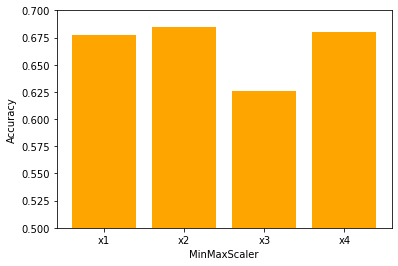

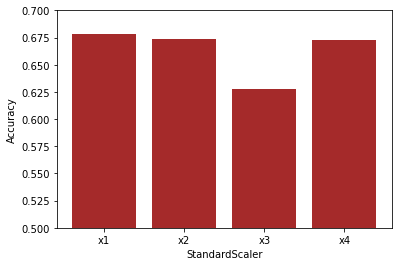

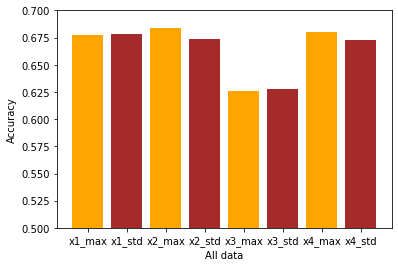

In [50]:
standardPloting(K100acc,['orange','brown'],'Accuracy',[0.5,0.7])

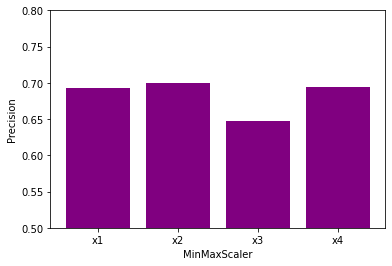

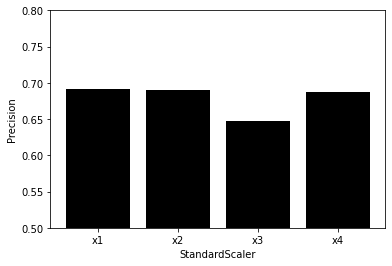

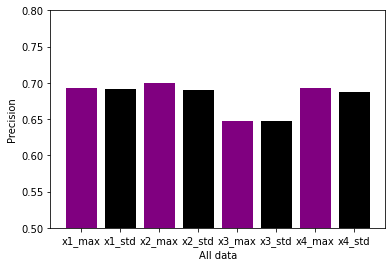

In [51]:
standardPloting(K100prec,['purple','black'],'Precision',[0.5,0.8])

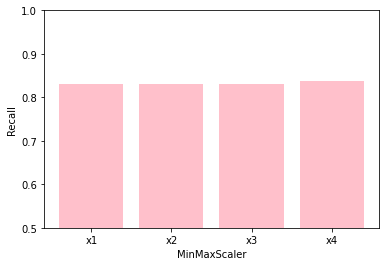

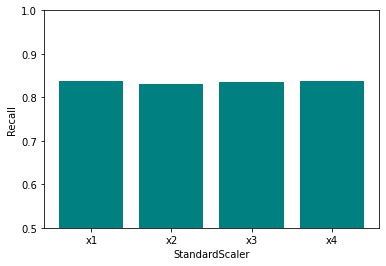

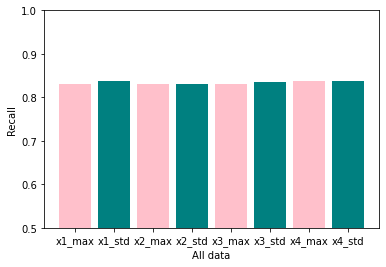

In [52]:
standardPloting(K100recall,['pink','teal'],'Recall',[0.5,1])

# Neural Network with SGD,ADAM and ADAMAX optimizers, functions and results

In [84]:
import tensorflow as tf

In [85]:
neural_network_acc=[[],[],[],[],[],[],[],[]]
neural_network_precision=[[],[],[],[],[],[],[],[]]
neural_network_recall=[[],[],[],[],[],[],[],[]]
neural_network_classification_report=[[],[],[],[],[],[],[],[]]

In [86]:
for j in range(8) :
  opt=['adam','sgd','adamax']
  epoch=[30]
  results_accuracy=[0,0,0]
  results_precision=[0,0,0]
  results_recall=[0,0,0]
  results_classification=['','','']


  b=0
  for i in opt :
    for k in epoch :
      model3 = tf.keras.models.Sequential([
       tf.keras.layers.Dense(64, activation='elu'),
        tf.keras.layers.Dense(128, activation='elu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(64, activation='elu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax'),

        tf.keras.layers.Dense(2)
      ])
      loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
      model3.compile(optimizer=i,
                loss=loss_fn,
                metrics=['accuracy'])
      model3.fit(x_train[j], y_train[j], epochs=k,batch_size=32)
      result=model3.predict(x_test[j])
      size_predict=len(y_test[j])
      results=np.zeros(size_predict)
      for count in range(size_predict):
        if result[count,0]>result[count,1]:
          results[count]=0
        else :
          results[count]=1
      y_pred=results
      acc=metrics.accuracy_score(y_test[j], y_pred)
      prec=metrics.precision_score(y_test[j], y_pred)
      rec=metrics.recall_score(y_test[j], y_pred)
      classi=metrics.classification_report(y_test[j], y_pred)
      results_accuracy[b]=acc
      results_precision[b]=prec
      results_recall[b]=rec
      results_classification[b]=classi
      b=b+1
      print(i)
      print(k)
  neural_network_acc[j]=results_accuracy
  neural_network_precision[j]=results_precision
  neural_network_recall[j]=results_recall
  neural_network_classification_report[j]=results_classification
print(neural_network_acc)

Epoch 1/30
576/576 [==============================] - 10s 14ms/step - loss: 0.6276 - accuracy: 0.6518
Epoch 2/30
576/576 [==============================] - 4s 7ms/step - loss: 0.6133 - accuracy: 0.6687
Epoch 3/30
576/576 [==============================] - 4s 8ms/step - loss: 0.6089 - accuracy: 0.6696
Epoch 4/30
576/576 [==============================] - 4s 7ms/step - loss: 0.6036 - accuracy: 0.6746
Epoch 5/30
576/576 [==============================] - 4s 7ms/step - loss: 0.5997 - accuracy: 0.6784
Epoch 6/30
576/576 [==============================] - 4s 7ms/step - loss: 0.5976 - accuracy: 0.6807
Epoch 7/30
576/576 [==============================] - 5s 9ms/step - loss: 0.5942 - accuracy: 0.6837
Epoch 8/30
576/576 [==============================] - 4s 7ms/step - loss: 0.5898 - accuracy: 0.6853
Epoch 9/30
576/576 [==============================] - 3s 6ms/step - loss: 0.5881 - accuracy: 0.6869
Epoch 10/30
576/576 [==============================] - 5s 8ms/step - loss: 0.5842 - accuracy: 0.69

In [87]:
for i in range(size):
  for j in range(3): 
    if i < 2 :
      print('x')
    elif i < 4 :
      print('x1')
    elif i < 6 :
      print('x2') 
    else :
      print('x3')
    if j < 2 :
      print('adam')
    elif j < 4 :
      print('sgd')
    elif j < 6 :
      print('adamax') 
    print('Accuracy:',neural_network_acc[i][j])
    print('Precision:',neural_network_precision[i][j])
    print('Recall:',neural_network_recall[i][j])

x
adam
Accuracy: 0.7956989247311828
Precision: 0.8048048048048048
Recall: 0.8715447154471545
x
adam
Accuracy: 0.7111436950146628
Precision: 0.7232704402515723
Recall: 0.8414634146341463
x
sgd
Accuracy: 0.7751710654936461
Precision: 0.7526246719160105
Recall: 0.932520325203252
x
adam
Accuracy: 0.873900293255132
Precision: 0.8796875
Recall: 0.9154471544715447
x
adam
Accuracy: 0.7717497556207233
Precision: 0.786626596543952
Recall: 0.8512195121951219
x
sgd
Accuracy: 0.8264907135874878
Precision: 0.8447596532702916
Recall: 0.8715447154471545
x1
adam
Accuracy: 0.7194525904203324
Precision: 0.7803418803418803
Recall: 0.7422764227642277
x1
adam
Accuracy: 0.6862170087976539
Precision: 0.7421746293245469
Recall: 0.732520325203252
x1
sgd
Accuracy: 0.7556207233626588
Precision: 0.7687776141384389
Recall: 0.848780487804878
x1
adam
Accuracy: 0.8690127077223851
Precision: 0.8817460317460317
Recall: 0.9032520325203252
x1
adam
Accuracy: 0.7605083088954057
Precision: 0.8285968028419183
Recall: 0.758536

In [88]:
for i in range(size):
  for j in range(3): 
    if i < 2 :
      print('x')
    elif i < 4 :
      print('x1')
    elif i < 6 :
      print('x2') 
    else :
      print('x3')
    if j < 2 :
      print('adam')
    elif j < 4 :
      print('sgd')
    elif j < 6 :
      print('adamax') 
    print('Classification:',neural_network_classification_report[i][j])

x
adam
Classification:               precision    recall  f1-score   support

           0       0.78      0.68      0.73       816
           1       0.80      0.87      0.84      1230

    accuracy                           0.80      2046
   macro avg       0.79      0.78      0.78      2046
weighted avg       0.79      0.80      0.79      2046

x
adam
Classification:               precision    recall  f1-score   support

           0       0.68      0.51      0.59       816
           1       0.72      0.84      0.78      1230

    accuracy                           0.71      2046
   macro avg       0.70      0.68      0.68      2046
weighted avg       0.71      0.71      0.70      2046

x
sgd
Classification:               precision    recall  f1-score   support

           0       0.84      0.54      0.66       816
           1       0.75      0.93      0.83      1230

    accuracy                           0.78      2046
   macro avg       0.80      0.74      0.74      2046
weight

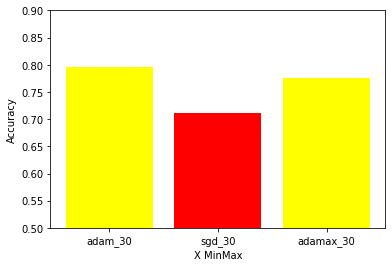

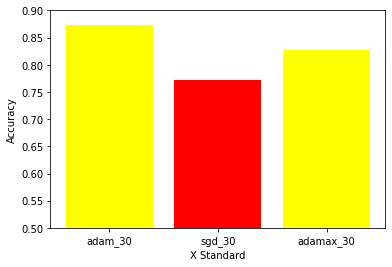

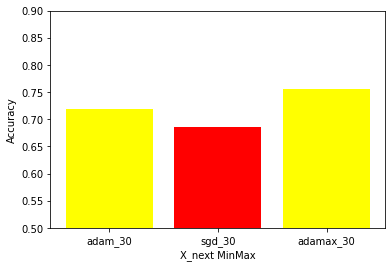

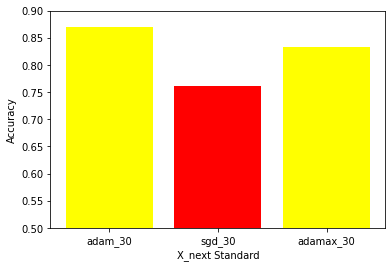

In [213]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[0],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[1],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[2],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X_next MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[3],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X_next Standard')
plt.ylim([0.5,0.9])
plt.show()

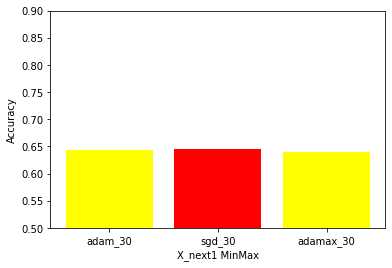

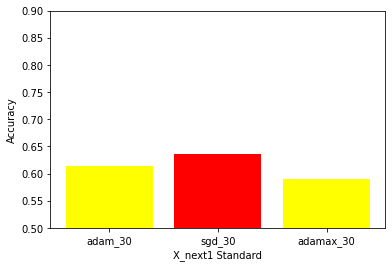

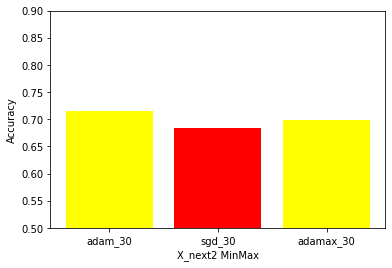

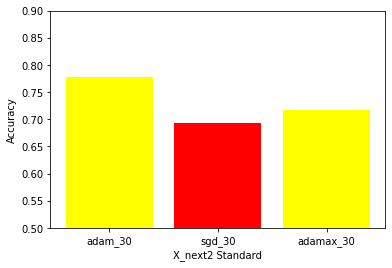

In [214]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[4],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X_next1 MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[5],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X_next1 Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[6],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X_next2 MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[7],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X_next2 Standard')
plt.ylim([0.5,0.9])
plt.show()

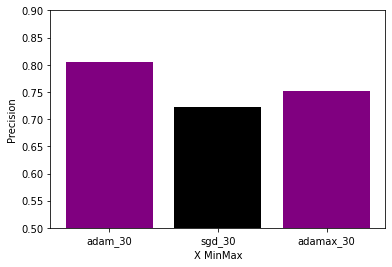

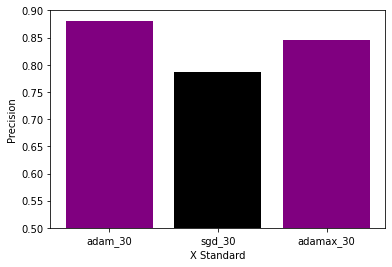

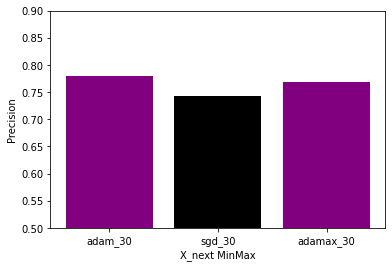

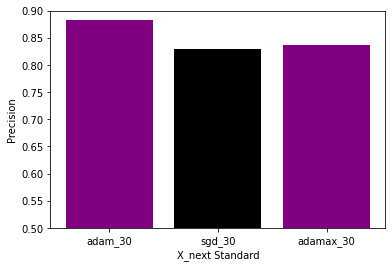

In [91]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[0],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[1],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[2],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X_next MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[3],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X_next Standard')
plt.ylim([0.5,0.9])
plt.show()

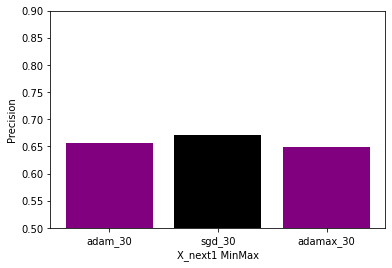

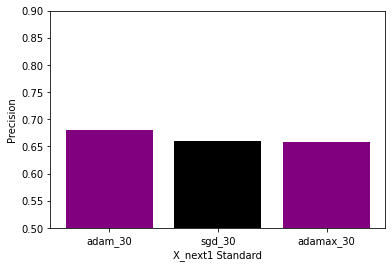

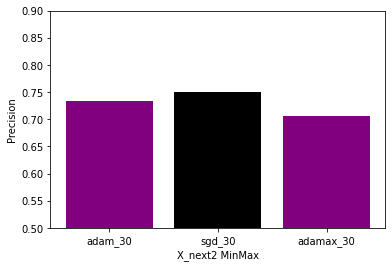

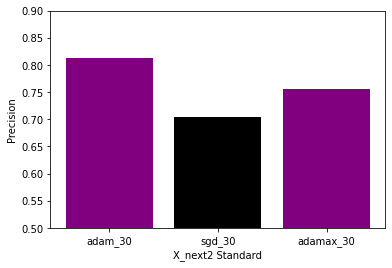

In [92]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[4],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X_next1 MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[5],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X_next1 Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[6],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X_next2 MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[7],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X_next2 Standard')
plt.ylim([0.5,0.9])
plt.show()

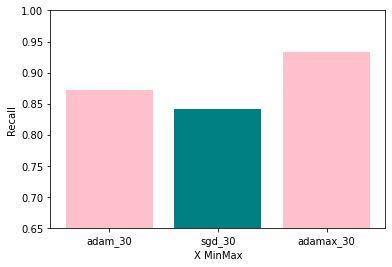

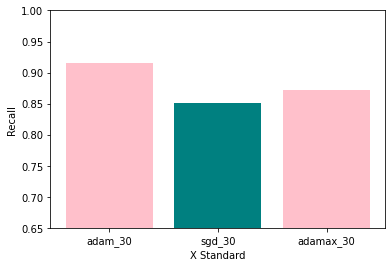

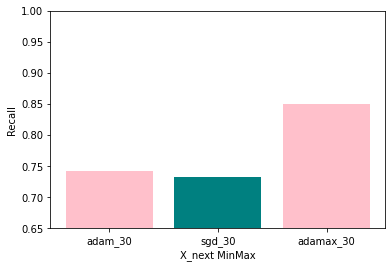

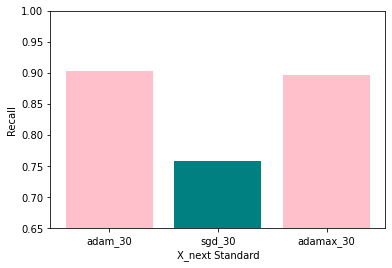

In [93]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[0],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X MinMax')
plt.ylim([0.65,1])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[1],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X Standard')
plt.ylim([0.65,1])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[2],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X_next MinMax')
plt.ylim([0.65,1])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[3],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X_next Standard')
plt.ylim([0.65,1])
plt.show()

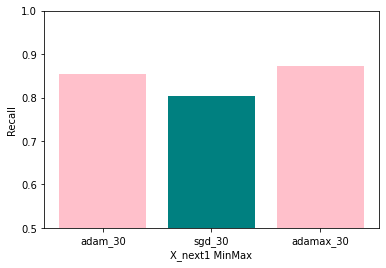

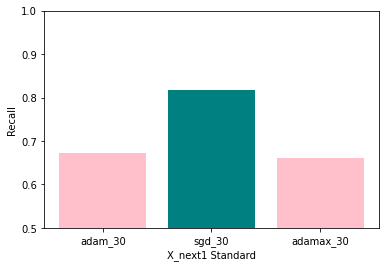

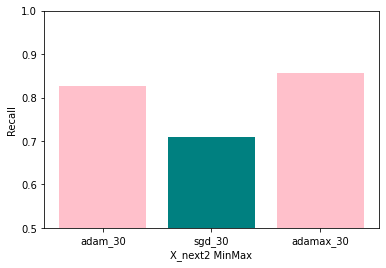

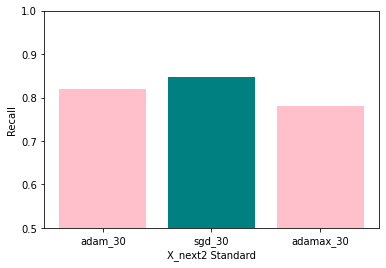

In [94]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[4],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X_next1 MinMax')
plt.ylim([0.5,1])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[5],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X_next1 Standard')
plt.ylim([0.5,1])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[6],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X_next2 MinMax')
plt.ylim([0.5,1])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[7],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X_next2 Standard')
plt.ylim([0.5,1])
plt.show()

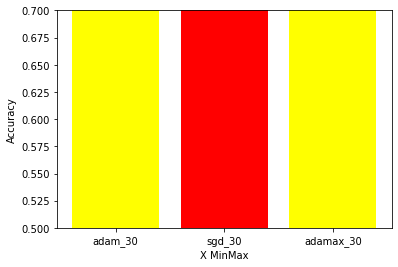

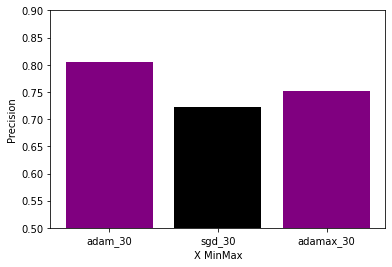

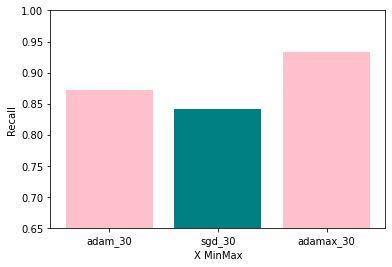

In [95]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[0],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X MinMax')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[0],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[0],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X MinMax')
plt.ylim([0.65,1])
plt.show()


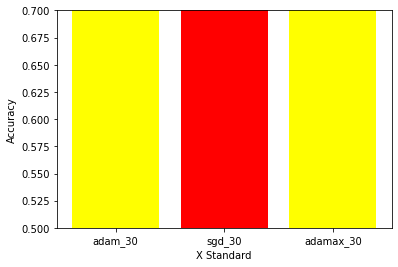

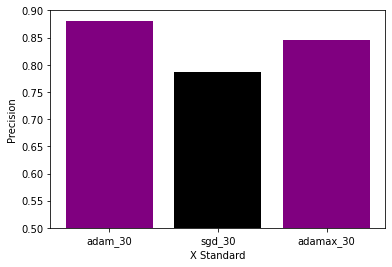

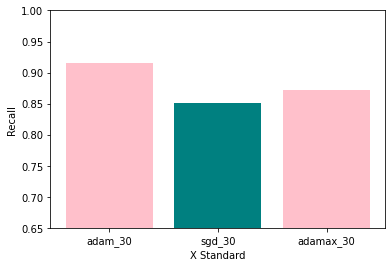

In [96]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[1],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X Standard')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[1],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[1],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X Standard')
plt.ylim([0.65,1])
plt.show()

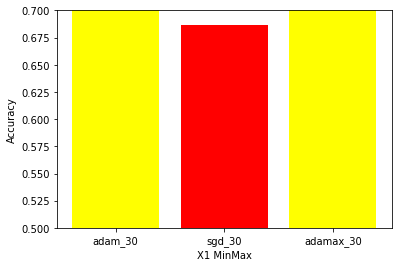

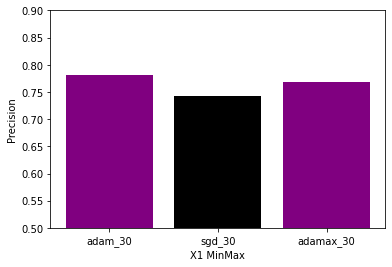

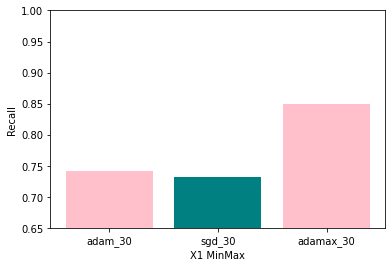

In [97]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[2],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X1 MinMax')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[2],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X1 MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[2],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X1 MinMax')
plt.ylim([0.65,1])
plt.show()


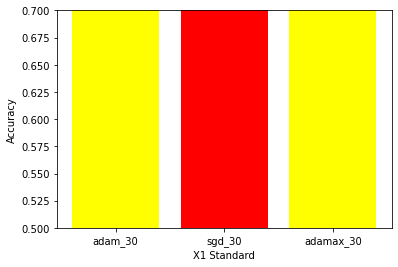

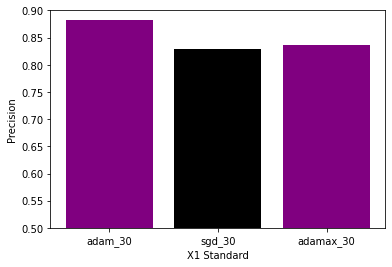

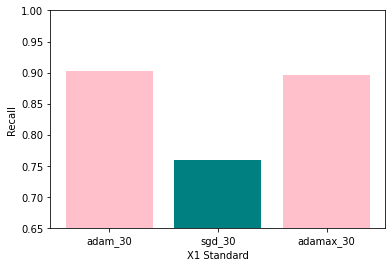

In [98]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[3],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X1 Standard')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[3],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X1 Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[3],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X1 Standard')
plt.ylim([0.65,1])
plt.show()

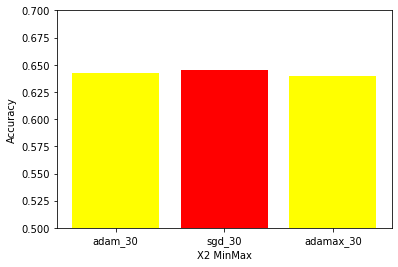

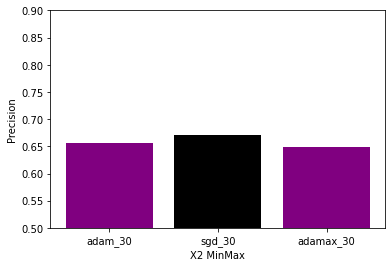

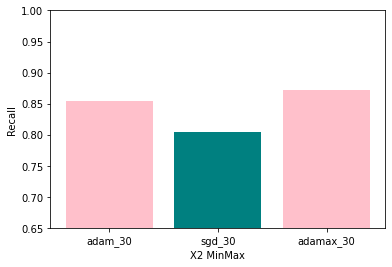

In [99]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[4],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X2 MinMax')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[4],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X2 MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[4],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X2 MinMax')
plt.ylim([0.65,1])
plt.show()

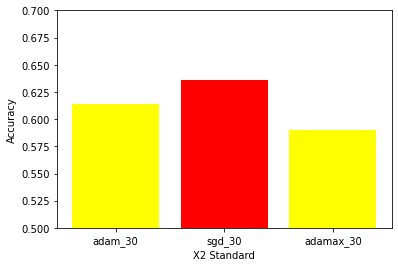

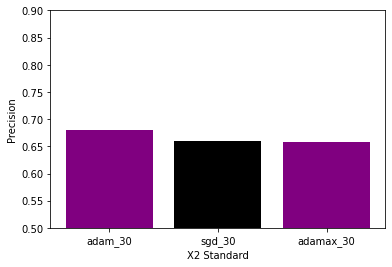

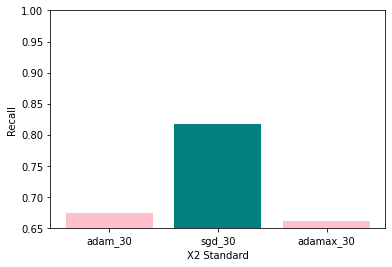

In [100]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[5],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X2 Standard')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[5],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X2 Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[5],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X2 Standard')
plt.ylim([0.65,1])
plt.show()

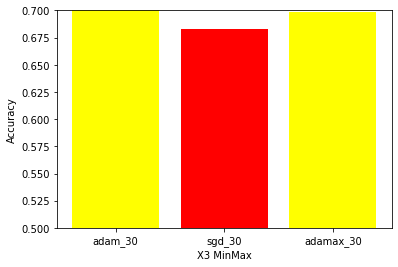

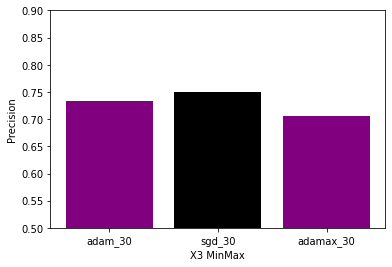

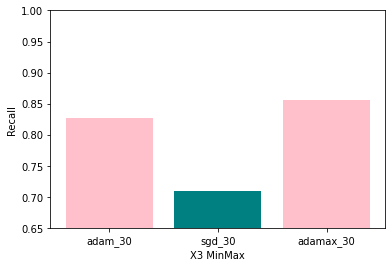

In [101]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[6],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X3 MinMax')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[6],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X3 MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[6],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X3 MinMax')
plt.ylim([0.65,1])
plt.show()

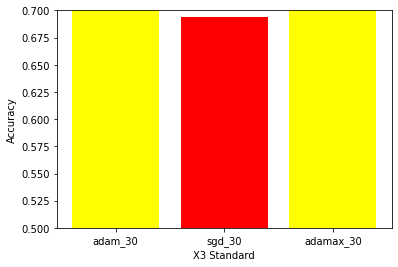

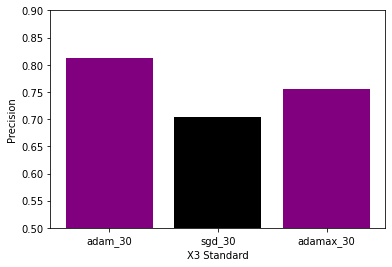

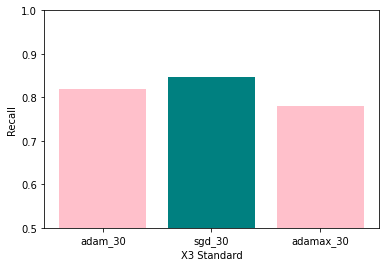

In [102]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[7],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X3 Standard')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[7],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X3 Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[7],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X3 Standard')
plt.ylim([0.5,1])
plt.show()

# Decision Tree and Random Forest, function and results

In [59]:
from sklearn.tree import DecisionTreeRegressor 
tree_acc=[0,0,0,0,0,0,0,0]
tree_prec=[0,0,0,0,0,0,0,0]
tree_recall=[0,0,0,0,0,0,0,0]
tree_classification=['','','','','','','','']
for j in range(8) :
  regressor = DecisionTreeRegressor(random_state = 42,max_depth=5) 
  regressor.fit(x_train[j], y_train[j])
  y_pred_tree = regressor.predict(x_test[j])
  length=len(y_test[j])
  length2=len(y_pred_tree)
  y_results=np.zeros(length2)
  for i in range(length) :
    if y_pred_tree[i] > 0.5 : 
     y_results[i]=1
  tree_acc[j]=metrics.accuracy_score(y_test[j], y_results)
  tree_prec[j]=metrics.precision_score(y_test[j], y_results)
  tree_recall[j]=metrics.recall_score(y_test[j], y_results)
  tree_classification[j]=metrics.classification_report(y_test[j], y_results)

In [60]:
print(tree_acc)

[0.7008797653958945, 0.7008797653958945, 0.7008797653958945, 0.7008797653958945, 0.6451612903225806, 0.6451612903225806, 0.7013685239491692, 0.7013685239491692]


In [61]:
print(tree_prec)

[0.7226224783861671, 0.7226224783861671, 0.7226224783861671, 0.7226224783861671, 0.6510791366906474, 0.6510791366906474, 0.721546170365068, 0.721546170365068]


In [62]:
print(tree_recall)

[0.8154471544715447, 0.8154471544715447, 0.8154471544715447, 0.8154471544715447, 0.8829268292682927, 0.8829268292682927, 0.8195121951219512, 0.8195121951219512]


In [63]:
print(tree_acc)

[0.7008797653958945, 0.7008797653958945, 0.7008797653958945, 0.7008797653958945, 0.6451612903225806, 0.6451612903225806, 0.7013685239491692, 0.7013685239491692]


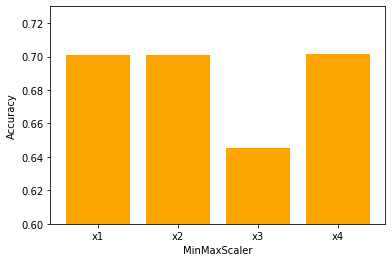

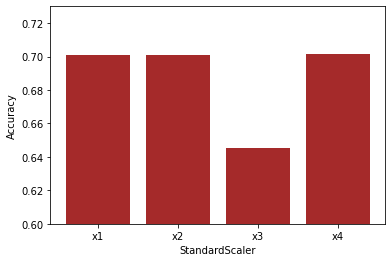

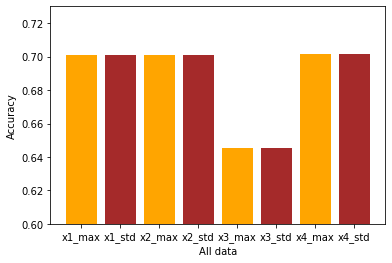

In [64]:
standardPloting(tree_acc,['orange','brown'],'Accuracy',[0.6,0.73])

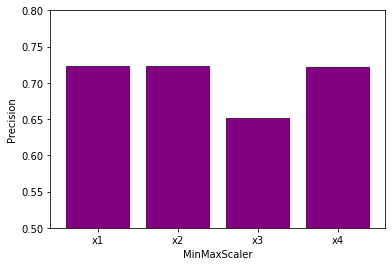

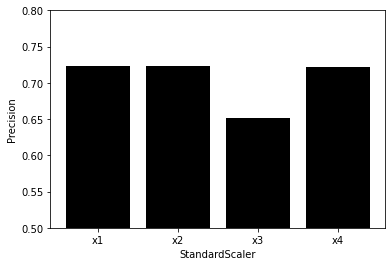

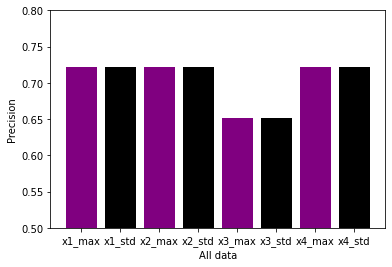

In [65]:
standardPloting(tree_prec,['purple','black'],'Precision',[0.5,0.8])

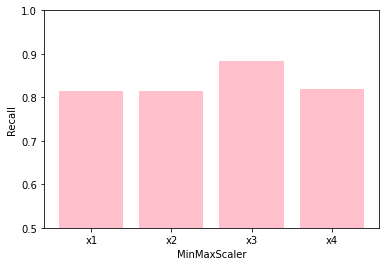

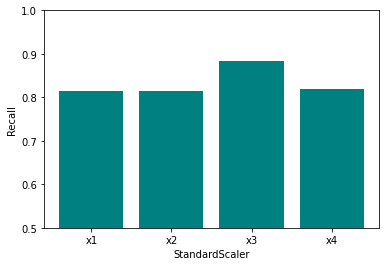

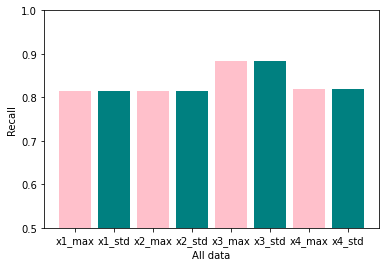

In [66]:
standardPloting(tree_recall,['pink','teal'],'Recall',[0.5,1])

In [67]:
for i in range(size):
  print(tree_classification[i])

              precision    recall  f1-score   support

           0       0.66      0.53      0.58       816
           1       0.72      0.82      0.77      1230

    accuracy                           0.70      2046
   macro avg       0.69      0.67      0.68      2046
weighted avg       0.70      0.70      0.69      2046

              precision    recall  f1-score   support

           0       0.66      0.53      0.58       816
           1       0.72      0.82      0.77      1230

    accuracy                           0.70      2046
   macro avg       0.69      0.67      0.68      2046
weighted avg       0.70      0.70      0.69      2046

              precision    recall  f1-score   support

           0       0.66      0.53      0.58       816
           1       0.72      0.82      0.77      1230

    accuracy                           0.70      2046
   macro avg       0.69      0.67      0.68      2046
weighted avg       0.70      0.70      0.69      2046

              preci

In [68]:
from sklearn.ensemble import RandomForestClassifier
forest_acc=[0,0,0,0,0,0,0,0]
forest_prec=[0,0,0,0,0,0,0,0]
forest_recall=[0,0,0,0,0,0,0,0]
forest_classification=['','','','','','','','']
for j in range(8) :
  clf = RandomForestClassifier(n_estimators = 100) 
  clf.fit(x_train[j], y_train[j])
  y_pred = clf.predict(x_test[j])
  length=len(y_test[j])
  y_results=np.zeros(length)
  for i in range(length) :
    if y_pred[i] > 0.5 : 
     y_results[i]=1
  forest_acc[j]=metrics.accuracy_score(y_test[j], y_results)
  forest_prec[j]=metrics.precision_score(y_test[j], y_results)
  forest_recall[j]=metrics.recall_score(y_test[j], y_results)
  forest_classification[j]=metrics.classification_report(y_test[j], y_results)

In [69]:
print(forest_acc)

[0.7218963831867058, 0.7267839687194526, 0.7140762463343109, 0.7243401759530792, 0.6173020527859238, 0.6329423264907136, 0.7057673509286413, 0.7013685239491692]


In [70]:
print(forest_prec)

[0.7355666429080542, 0.7381121362668559, 0.7318475916606758, 0.7368421052631579, 0.6496985934360349, 0.6599866399465598, 0.7198879551820728, 0.7187279151943463]


In [71]:
print(forest_recall)

[0.8390243902439024, 0.8455284552845529, 0.8276422764227642, 0.8422764227642277, 0.7886178861788617, 0.8032520325203252, 0.8357723577235773, 0.8268292682926829]


In [72]:
print(forest_acc)

[0.7218963831867058, 0.7267839687194526, 0.7140762463343109, 0.7243401759530792, 0.6173020527859238, 0.6329423264907136, 0.7057673509286413, 0.7013685239491692]


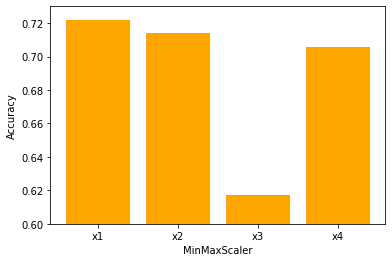

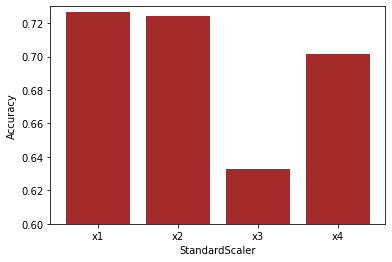

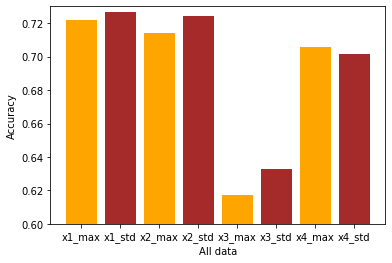

In [73]:
standardPloting(forest_acc,['orange','brown'],'Accuracy',[0.6,0.73])

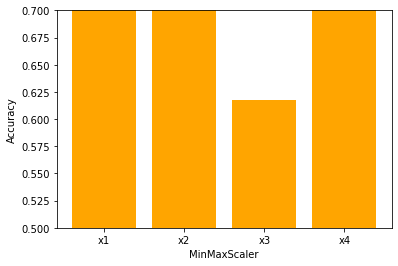

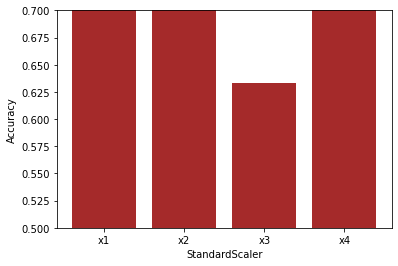

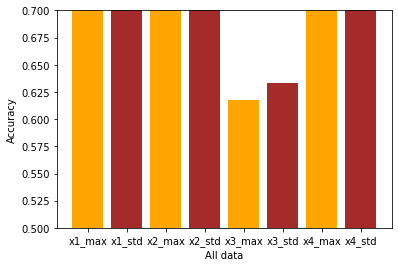

In [74]:
standardPloting(forest_acc,['orange','brown'],'Accuracy',[0.5,0.7])

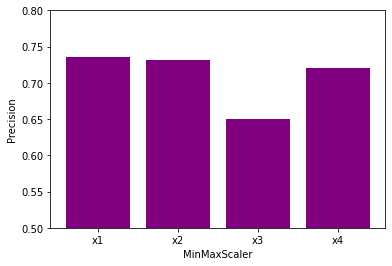

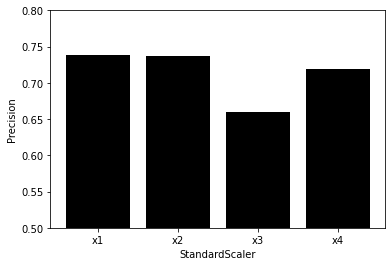

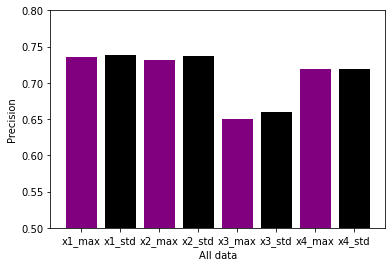

In [75]:
standardPloting(forest_prec,['purple','black'],'Precision',[0.5,0.8])

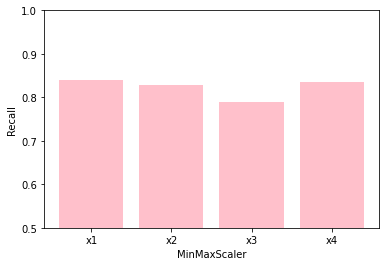

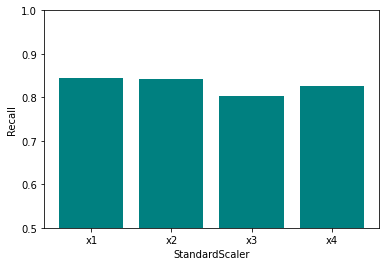

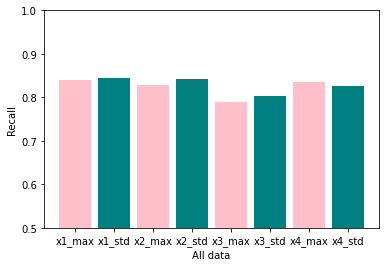

In [76]:
standardPloting(forest_recall,['pink','teal'],'Recall',[0.5,1])

In [77]:
for i in range(size) :
  print(forest_classification[i])

              precision    recall  f1-score   support

           0       0.69      0.55      0.61       816
           1       0.74      0.84      0.78      1230

    accuracy                           0.72      2046
   macro avg       0.71      0.69      0.70      2046
weighted avg       0.72      0.72      0.71      2046

              precision    recall  f1-score   support

           0       0.70      0.55      0.62       816
           1       0.74      0.85      0.79      1230

    accuracy                           0.73      2046
   macro avg       0.72      0.70      0.70      2046
weighted avg       0.72      0.73      0.72      2046

              precision    recall  f1-score   support

           0       0.68      0.54      0.60       816
           1       0.73      0.83      0.78      1230

    accuracy                           0.71      2046
   macro avg       0.70      0.69      0.69      2046
weighted avg       0.71      0.71      0.71      2046

              preci

# SVM Linear, Poly and RBF kernels,function and results

In [18]:
from sklearn import svm


In [73]:
linear_acc=[0,0,0,0,0,0,0,0]
linear_prec=[0,0,0,0,0,0,0,0]
linear_recall=[0,0,0,0,0,0,0,0]
linear_classification=['','','','','','','','']
for i in range(size):
  clf = svm.SVC(kernel='linear')
  clf.fit(x_train[i], y_train[i])
  y_pred = clf.predict(x_test[i])
  linear_acc[i]=metrics.accuracy_score(y_test[i], y_pred)
  linear_prec[i]=metrics.precision_score(y_test[i], y_pred)
  linear_recall[i]=metrics.recall_score(y_test[i], y_pred)
  linear_classification[i]=metrics.classification_report(y_test[i], y_pred)

In [74]:
print(linear_acc)

[0.7253176930596286, 0.729227761485826, 0.7214076246334311, 0.7302052785923754, 0.6441837732160313, 0.6436950146627566, 0.7209188660801564, 0.7272727272727273]


In [75]:
print(linear_prec)

[0.7297111416781293, 0.7366946778711485, 0.7266483516483516, 0.7347645429362881, 0.6440872560275546, 0.645049218297626, 0.7264604810996563, 0.7343096234309623]


In [76]:
print(linear_recall)

[0.8626016260162601, 0.8552845528455284, 0.8601626016260162, 0.8626016260162601, 0.9121951219512195, 0.9056910569105691, 0.859349593495935, 0.8560975609756097]


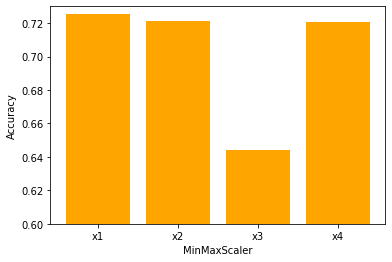

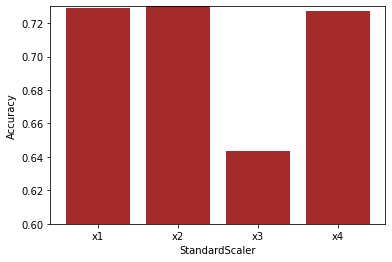

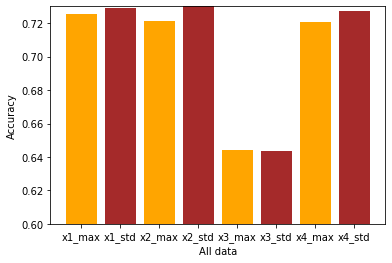

In [77]:
standardPloting(linear_acc,['orange','brown'],'Accuracy',[0.60,0.73])

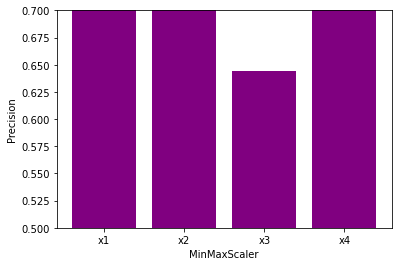

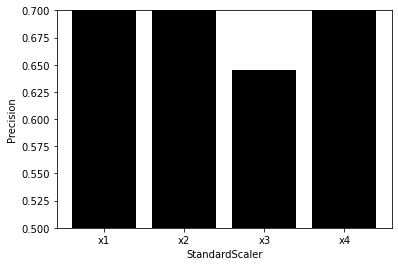

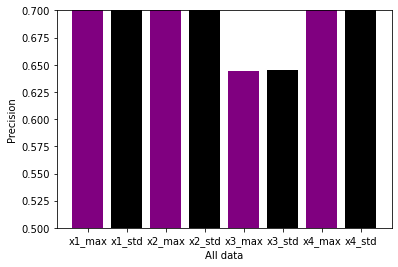

In [78]:
standardPloting(linear_prec,['purple','black'],'Precision',[0.5,0.7])

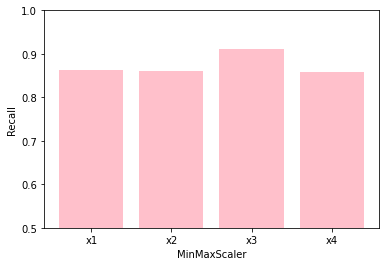

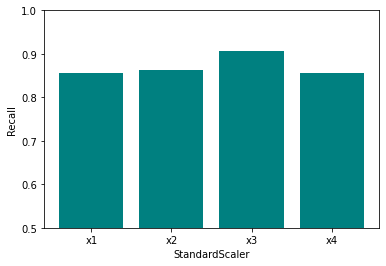

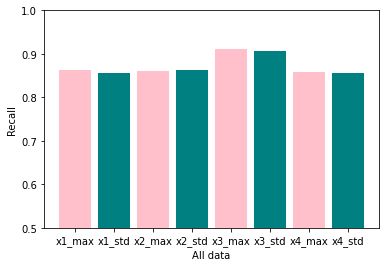

In [79]:
standardPloting(linear_recall,['pink','teal'],'Recall',[0.5,1])

In [80]:
for i in range(size) :
  print(linear_classification[i])

              precision    recall  f1-score   support

           0       0.71      0.52      0.60       816
           1       0.73      0.86      0.79      1230

    accuracy                           0.73      2046
   macro avg       0.72      0.69      0.70      2046
weighted avg       0.72      0.73      0.71      2046

              precision    recall  f1-score   support

           0       0.71      0.54      0.61       816
           1       0.74      0.86      0.79      1230

    accuracy                           0.73      2046
   macro avg       0.72      0.70      0.70      2046
weighted avg       0.73      0.73      0.72      2046

              precision    recall  f1-score   support

           0       0.71      0.51      0.59       816
           1       0.73      0.86      0.79      1230

    accuracy                           0.72      2046
   macro avg       0.72      0.69      0.69      2046
weighted avg       0.72      0.72      0.71      2046

              preci

In [81]:
print(linear_acc)

[0.7253176930596286, 0.729227761485826, 0.7214076246334311, 0.7302052785923754, 0.6441837732160313, 0.6436950146627566, 0.7209188660801564, 0.7272727272727273]


In [19]:
poly_acc=[0,0,0,0,0,0,0,0]
poly_prec=[0,0,0,0,0,0,0,0]
poly_recall=[0,0,0,0,0,0,0,0]
poly_classification=['','','','','','','','']
for i in range(size):
  clf = svm.SVC(kernel='poly')
  clf.fit(x_train[i], y_train[i])
  y_pred = clf.predict(x_test[i])
  poly_acc[i]=metrics.accuracy_score(y_test[i], y_pred)
  poly_prec[i]=metrics.precision_score(y_test[i], y_pred)
  poly_recall[i]=metrics.recall_score(y_test[i], y_pred)
  poly_classification[i]=metrics.classification_report(y_test[i], y_pred)

In [52]:
print(poly_acc)

[0.7448680351906158, 0.7082111436950147, 0.7639296187683284, 0.7033235581622679, 0.6402737047898338, 0.6197458455522972, 0.7189638318670577, 0.6881720430107527]


In [53]:
print(poly_prec)

[0.7521367521367521, 0.69009009009009, 0.7712418300653595, 0.6864153201675643, 0.6382978723404256, 0.6174636174636174, 0.7347670250896058, 0.682716049382716]


In [54]:
print(poly_recall)

[0.8585365853658536, 0.9341463414634147, 0.8634146341463415, 0.932520325203252, 0.926829268292683, 0.9658536585365853, 0.8333333333333334, 0.8991869918699187]


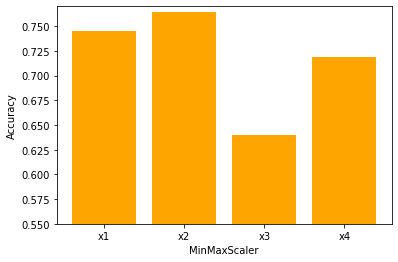

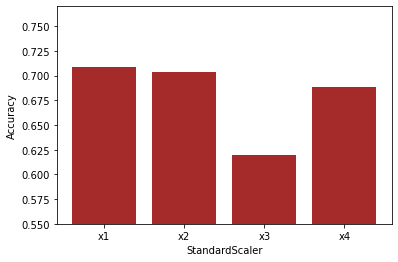

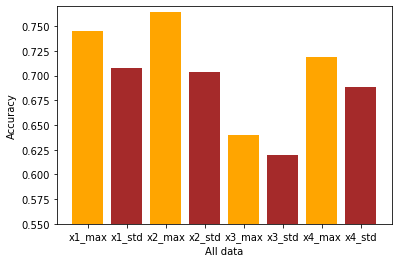

In [55]:
standardPloting(poly_acc,['orange','brown'],'Accuracy',[0.55,0.77])

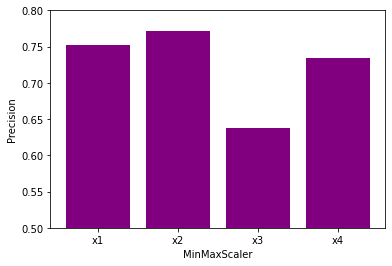

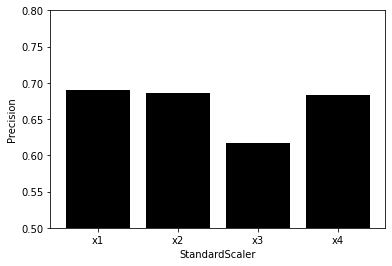

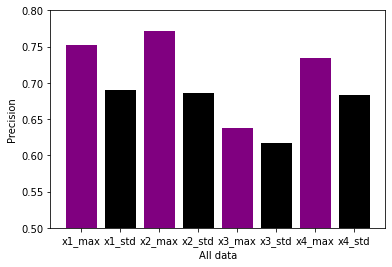

In [56]:
standardPloting(poly_prec,['purple','black'],'Precision',[0.5,0.8])

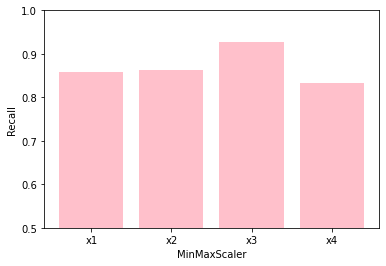

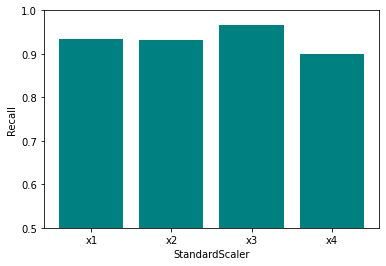

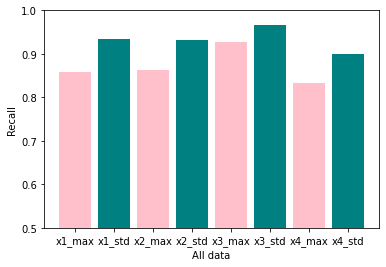

In [57]:
standardPloting(poly_recall,['pink','teal'],'Recall',[0.5,1])

In [58]:
for i in range(size) :
  print(poly_classification[i])

              precision    recall  f1-score   support

           0       0.73      0.57      0.64       816
           1       0.75      0.86      0.80      1230

    accuracy                           0.74      2046
   macro avg       0.74      0.72      0.72      2046
weighted avg       0.74      0.74      0.74      2046

              precision    recall  f1-score   support

           0       0.79      0.37      0.50       816
           1       0.69      0.93      0.79      1230

    accuracy                           0.71      2046
   macro avg       0.74      0.65      0.65      2046
weighted avg       0.73      0.71      0.68      2046

              precision    recall  f1-score   support

           0       0.75      0.61      0.67       816
           1       0.77      0.86      0.81      1230

    accuracy                           0.76      2046
   macro avg       0.76      0.74      0.74      2046
weighted avg       0.76      0.76      0.76      2046

              preci

In [215]:
rbf_acc=[0,0,0,0,0,0,0,0]
rbf_prec=[0,0,0,0,0,0,0,0]
rbf_recall=[0,0,0,0,0,0,0,0]
rbf_classification=['','','','','','','','']
for i in range(size):
  clf = svm.SVC(kernel='rbf')
  clf.fit(x_train[i], y_train[i])
  y_pred = clf.predict(x_test[i])
  rbf_acc[i]=metrics.accuracy_score(y_test[i], y_pred)
  rbf_prec[i]=metrics.precision_score(y_test[i], y_pred)
  rbf_recall[i]=metrics.recall_score(y_test[i], y_pred)
  rbf_classification[i]=metrics.classification_report(y_test[i], y_pred)

In [216]:
print(rbf_acc)

[0.7306940371456501, 0.7199413489736071, 0.7331378299120235, 0.7248289345063539, 0.64613880742913, 0.6383186705767351, 0.7204301075268817, 0.7106549364613881]


In [217]:
print(rbf_prec)

[0.7323750855578371, 0.7251542152159013, 0.7355371900826446, 0.728894989704873, 0.6522262334536703, 0.6460071513706794, 0.7222972972972973, 0.7161246612466124]


In [218]:
print(rbf_recall)

[0.8699186991869918, 0.8601626016260162, 0.8682926829268293, 0.8634146341463415, 0.8813008130081301, 0.8813008130081301, 0.8691056910569106, 0.859349593495935]


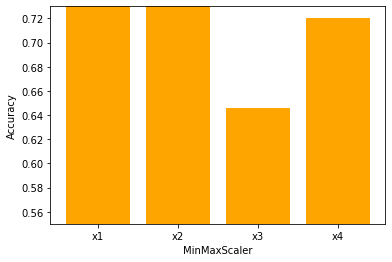

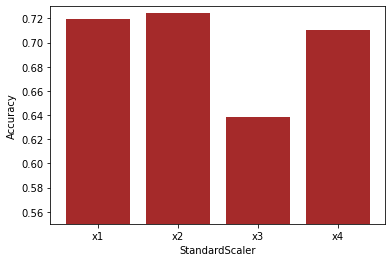

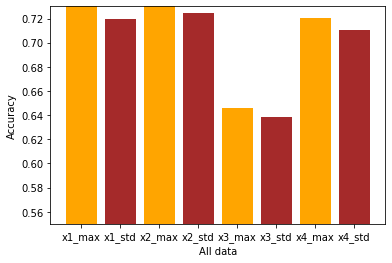

In [226]:
standardPloting(rbf_acc,['orange','brown'],'Accuracy',[0.55,0.73])

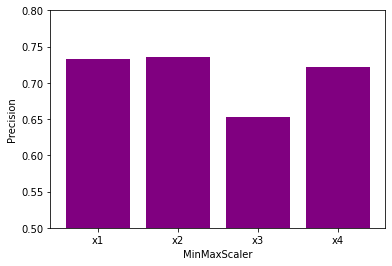

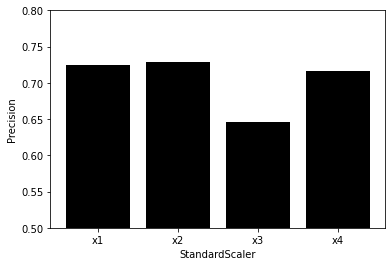

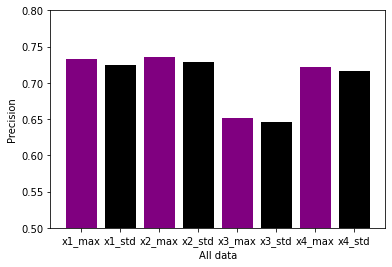

In [227]:
standardPloting(rbf_prec,['purple','black'],'Precision',[0.5,0.8])

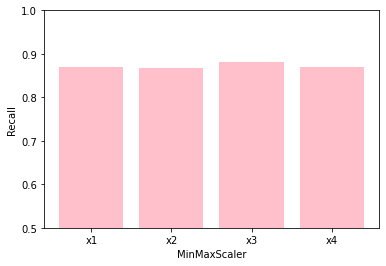

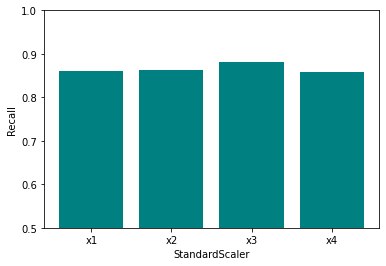

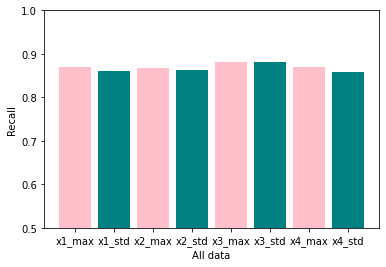

In [228]:
standardPloting(rbf_recall,['pink','teal'],'Recall',[0.5,1])

In [229]:
for i in range(size) :
  print(rbf_classification[i])

              precision    recall  f1-score   support

           0       0.73      0.52      0.61       816
           1       0.73      0.87      0.80      1230

    accuracy                           0.73      2046
   macro avg       0.73      0.70      0.70      2046
weighted avg       0.73      0.73      0.72      2046

              precision    recall  f1-score   support

           0       0.71      0.51      0.59       816
           1       0.73      0.86      0.79      1230

    accuracy                           0.72      2046
   macro avg       0.72      0.68      0.69      2046
weighted avg       0.72      0.72      0.71      2046

              precision    recall  f1-score   support

           0       0.73      0.53      0.61       816
           1       0.74      0.87      0.80      1230

    accuracy                           0.73      2046
   macro avg       0.73      0.70      0.70      2046
weighted avg       0.73      0.73      0.72      2046

              preci

# Year Prediction

In [375]:
year_select=2010

In [376]:
data1=data.loc[(data['SEASON']==year_select)]
data2=data.loc[(data['SEASON']>(year_select-5))&(data['SEASON']<year_select)]

In [377]:
x1_test=data1[['H_S_ELO','H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_TS','H_S_WP','H_S_WL','H_S_FG3_PCT','H_S_FTR',
               'H_L5_PTS','H_L5_PTS_A','H_L5_NET_RATING',
               'A_S_ELO','A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_TS','A_S_WP','A_S_WL','A_S_FG3_PCT','A_S_FTR',
               'A_L5_PTS','A_L5_PTS_A','A_L5_NET_RATING']]
x3_test=data1[['H_S_ELO','H_S_WP','H_S_WL','H_S_NET_RATING','H_S_TS','H_S_TS_A','H_S_EFG','H_S_EFG_A','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_REB','H_S_AST_A','H_S_REB_A','H_S_FTR',
             'A_S_ELO','A_S_WP','A_S_WL','A_S_NET_RATING','A_S_TS','A_S_TS_A','A_S_EFG','A_S_EFG_A','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_REB','A_S_AST_A','A_S_REB_A','A_S_FTR']]
x5_test=data1[['H_L5_WP','H_L5_NET_RATING','H_L5_TS','H_L5_TS_A','H_L5_PTS','H_L5_PTS_A','H_L5_AST','H_L5_REB','H_L5_AST_A',
              'A_L5_WP','A_L5_NET_RATING','A_L5_TS','A_L5_TS_A','A_L5_PTS','A_L5_PTS_A','A_L5_AST','A_L5_REB','A_L5_AST_A']]
x7_test=data1[['H_S_ELO','H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_WP','H_S_WL','H_S_AST','H_S_REB','H_S_OREB','H_S_TS','H_S_STL','H_S_BLK','H_S_AST_A','H_S_REB_A','H_S_OREB_A','H_S_TS_A','H_S_FTR',
              'A_S_ELO','A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_WP','A_S_WL','A_S_AST','A_S_REB','H_S_OREB','A_S_TS','A_S_STL','A_S_BLK','A_S_AST_A','A_S_REB_A','A_S_OREB_A','A_S_TS_A','A_S_FTR',
              'H_L5_NET_RATING','H_L5_PTS','H_L5_PTS_A','H_L5_WP','H_L5_AST','H_L5_REB','H_L5_OREB','H_L5_TS','H_L5_STL','H_L5_BLK','H_L5_AST_A','H_L5_REB_A','H_L5_OREB_A','H_L5_TS_A','H_L5_FTR',
              'A_L5_NET_RATING','A_L5_PTS','A_L5_PTS_A','A_L5_WP','A_L5_AST','A_L5_REB','A_L5_OREB','A_L5_TS','A_L5_STL','A_L5_BLK','A_L5_AST_A','A_L5_REB_A','A_L5_OREB_A','A_L5_TS_A','A_L5_FTR']]
y=data1['HOME_TEAM_WINS']
x1_test=x1_test.to_numpy()
x3_test=x3_test.to_numpy()
x5_test=x5_test.to_numpy()
x7_test=x7_test.to_numpy()
y=y.to_numpy()
scaler=MinMaxScaler()
scaler2=StandardScaler()
x2_test=x1_test
x1_test=scaler.fit_transform(x1_test)
x2_test=scaler2.fit_transform(x2_test)
x4_test=x3_test
scaler=MinMaxScaler()
scaler2=StandardScaler()
x3_test= scaler.fit_transform(x3_test)
x4_test = scaler2.fit_transform(x4_test)
x6_test=x5_test
scaler=MinMaxScaler()
scaler2=StandardScaler()
x5_test= scaler.fit_transform(x5_test)
x6_test = scaler2.fit_transform(x6_test)
x8_test=x7_test
scaler=MinMaxScaler()
scaler2=StandardScaler()
x7_test = scaler.fit_transform(x7_test)
x8_test = scaler2.fit_transform(x8_test)
y1_test=y
y2_test=y
y3_test=y
y4_test=y
y5_test=y
y6_test=y
y7_test=y
y8_test=y

In [378]:
x1_train=data2[['H_S_ELO','H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_TS','H_S_WP','H_S_WL','H_S_FG3_PCT','H_S_FTR',
               'H_L5_PTS','H_L5_PTS_A','H_L5_NET_RATING',
               'A_S_ELO','A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_TS','A_S_WP','A_S_WL','A_S_FG3_PCT','A_S_FTR',
               'A_L5_PTS','A_L5_PTS_A','A_L5_NET_RATING']]
x3_train=data2[['H_S_ELO','H_S_WP','H_S_WL','H_S_NET_RATING','H_S_TS','H_S_TS_A','H_S_EFG','H_S_EFG_A','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_REB','H_S_AST_A','H_S_REB_A','H_S_FTR',
             'A_S_ELO','A_S_WP','A_S_WL','A_S_NET_RATING','A_S_TS','A_S_TS_A','A_S_EFG','A_S_EFG_A','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_REB','A_S_AST_A','A_S_REB_A','A_S_FTR']]
x5_train=data2[['H_L5_WP','H_L5_NET_RATING','H_L5_TS','H_L5_TS_A','H_L5_PTS','H_L5_PTS_A','H_L5_AST','H_L5_REB','H_L5_AST_A',
              'A_L5_WP','A_L5_NET_RATING','A_L5_TS','A_L5_TS_A','A_L5_PTS','A_L5_PTS_A','A_L5_AST','A_L5_REB','A_L5_AST_A']]
x7_train=data2[['H_S_ELO','H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_WP','H_S_WL','H_S_AST','H_S_REB','H_S_OREB','H_S_TS','H_S_STL','H_S_BLK','H_S_AST_A','H_S_REB_A','H_S_OREB_A','H_S_TS_A','H_S_FTR',
              'A_S_ELO','A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_WP','A_S_WL','A_S_AST','A_S_REB','H_S_OREB','A_S_TS','A_S_STL','A_S_BLK','A_S_AST_A','A_S_REB_A','A_S_OREB_A','A_S_TS_A','A_S_FTR',
              'H_L5_NET_RATING','H_L5_PTS','H_L5_PTS_A','H_L5_WP','H_L5_AST','H_L5_REB','H_L5_OREB','H_L5_TS','H_L5_STL','H_L5_BLK','H_L5_AST_A','H_L5_REB_A','H_L5_OREB_A','H_L5_TS_A','H_L5_FTR',
              'A_L5_NET_RATING','A_L5_PTS','A_L5_PTS_A','A_L5_WP','A_L5_AST','A_L5_REB','A_L5_OREB','A_L5_TS','A_L5_STL','A_L5_BLK','A_L5_AST_A','A_L5_REB_A','A_L5_OREB_A','A_L5_TS_A','A_L5_FTR']]
y=data2['HOME_TEAM_WINS']
x1_train=x1_train.to_numpy()
x3_train=x3_train.to_numpy()
x5_train=x5_train.to_numpy()
x7_train=x7_train.to_numpy()
y=y.to_numpy()
scaler=MinMaxScaler()
scaler2=StandardScaler()
x2_train=x1_train
x1_train=scaler.fit_transform(x1_train)
x2_train=scaler2.fit_transform(x2_train)
x4_train=x3_train
scaler=MinMaxScaler()
scaler2=StandardScaler()
x3_train= scaler.fit_transform(x3_train)
x4_train = scaler2.fit_transform(x4_train)
x6_train=x5_train
scaler=MinMaxScaler()
scaler2=StandardScaler()
x5_train= scaler.fit_transform(x5_train)
x6_train = scaler2.fit_transform(x6_train)
x8_train=x7_train
scaler=MinMaxScaler()
scaler2=StandardScaler()
x7_train = scaler.fit_transform(x7_train)
x8_train = scaler2.fit_transform(x8_train)
y1_train=y
y2_train=y
y3_train=y
y4_train=y
y5_train=y
y6_train=y
y7_train=y
y8_train=y

In [379]:
x_train=[x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train]
x_test=[x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test]
y_train=[y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train]
y_test=[y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test]
size=8

In [ ]:
linear_acc_year=[0,0,0,0,0,0,0,0]
linear_prec_year=[0,0,0,0,0,0,0,0]
linear_recall_year=[0,0,0,0,0,0,0,0]
linear_classification_year=['','','','','','','','']
for i in range(size):
  clf = svm.SVC(kernel='linear')
  clf.fit(x_train[i], y_train[i])
  y_pred = clf.predict(x_test[i])
  linear_acc_year[i]=metrics.accuracy_score(y_test[i], y_pred)
  linear_prec_year[i]=metrics.precision_score(y_test[i], y_pred)
  linear_recall_year[i]=metrics.recall_score(y_test[i], y_pred)
  linear_classification_year[i]=metrics.classification_report(y_test[i], y_pred)

In [380]:
poly_acc_year=[0,0,0,0,0,0,0,0]
poly_prec_year=[0,0,0,0,0,0,0,0]
poly_recall_year=[0,0,0,0,0,0,0,0]
poly_classification_year=['','','','','','','','']
for i in range(size):
  clf = svm.SVC(kernel='poly')
  clf.fit(x_train[i], y_train[i])
  y_pred = clf.predict(x_test[i])
  poly_acc_year[i]=metrics.accuracy_score(y_test[i], y_pred)
  poly_prec_year[i]=metrics.precision_score(y_test[i], y_pred)
  poly_recall_year[i]=metrics.recall_score(y_test[i], y_pred)
  poly_classification_year[i]=metrics.classification_report(y_test[i], y_pred)

In [381]:
print(poly_acc_year) #2010

[0.6939721792890263, 0.6931993817619784, 0.6700154559505409, 0.6746522411128284, 0.625193199381762, 0.6306027820710973, 0.5950540958268934, 0.6568778979907264]


In [374]:
print(poly_acc_year) #2018

[0.6118827160493827, 0.6435185185185185, 0.6242283950617284, 0.658179012345679, 0.5555555555555556, 0.6134259259259259, 0.5864197530864198, 0.6334876543209876]


In [236]:
print(linear_acc_year) #2018

[0.6728395061728395, 0.6712962962962963, 0.6628086419753086, 0.6759259259259259, 0.6141975308641975, 0.6257716049382716, 0.6689814814814815, 0.6751543209876543]


In [245]:
print(linear_prec_year) #2018

[0.6901565995525727, 0.696969696969697, 0.6585838991270611, 0.7014051522248244, 0.7068965517241379, 0.6424923391215526, 0.6757607555089192, 0.7058823529411765]


In [246]:
print(linear_recall_year) #2018

[0.8075916230366492, 0.7827225130890052, 0.8887434554973822, 0.7840314136125655, 0.5903141361256544, 0.8232984293193717, 0.8429319371727748, 0.7696335078534031]


In [248]:
print(linear_acc_year) #2017

[0.6273148148148148, 0.6867283950617284, 0.6087962962962963, 0.6867283950617284, 0.6057098765432098, 0.6234567901234568, 0.6165123456790124, 0.6890432098765432]


In [249]:
print(linear_prec_year) #2017

[0.6141797197032152, 0.7025171624713958, 0.6006364359586317, 0.702054794520548, 0.5996797437950361, 0.6362725450901804, 0.6068237205523964, 0.7063583815028902]


In [250]:
print(linear_recall_year) #2017

[0.9802631578947368, 0.8078947368421052, 0.993421052631579, 0.8092105263157895, 0.9855263157894737, 0.8355263157894737, 0.9828947368421053, 0.8039473684210526]


In [257]:
print(linear_acc_year) #2016

[0.6844547563805105, 0.6937354988399071, 0.6736272235112142, 0.6929621036349575, 0.6109822119102861, 0.6140757927300851, 0.6689868522815159, 0.6875483372003094]


In [258]:
print(linear_prec_year) #2016

[0.6913716814159292, 0.706221198156682, 0.6676767676767676, 0.7063583815028902, 0.618732261116367, 0.6302349336057201, 0.6523364485981309, 0.7049180327868853]


In [259]:
print(linear_recall_year) #2016

[0.8289124668435013, 0.8129973474801061, 0.876657824933687, 0.8103448275862069, 0.8673740053050398, 0.8183023872679045, 0.9257294429708223, 0.7984084880636605]


In [266]:
print(linear_acc_year) #2015

[0.6620477290223249, 0.7074672825250192, 0.6751347190146266, 0.7036181678214011, 0.6381832178598922, 0.6358737490377213, 0.6812933025404158, 0.7059276366435719]


In [267]:
print(linear_prec_year) #2015

[0.7882960413080895, 0.7218468468468469, 0.7802547770700637, 0.7158712541620422, 0.6464354527938343, 0.6553147574819401, 0.7616279069767442, 0.723744292237443]


In [268]:
print(linear_recall_year) #2015

[0.5917312661498708, 0.8281653746770026, 0.6330749354005168, 0.8333333333333334, 0.8669250645994832, 0.8204134366925064, 0.6770025839793282, 0.8191214470284238]


In [275]:
print(linear_acc_year) #2014

[0.6561051004636785, 0.7194744976816074, 0.6421947449768161, 0.7078825347758887, 0.6236476043276662, 0.634466769706337, 0.6089644513137558, 0.7117465224111282]


In [276]:
print(linear_prec_year) #2014

[0.6325622775800712, 0.7183908045977011, 0.6215277777777778, 0.7071509648127128, 0.6118881118881119, 0.6328740157480315, 0.5968928863450531, 0.7092760180995475]


In [277]:
print(linear_recall_year) #2014

[0.9569313593539704, 0.8411843876177658, 0.9636608344549125, 0.8384925975773889, 0.9421265141318977, 0.8654104979811574, 0.9825033647375505, 0.8438761776581427]


In [284]:
print(linear_acc_year) #2013

[0.6682027649769585, 0.6866359447004609, 0.6797235023041475, 0.6904761904761905, 0.6067588325652842, 0.6251920122887865, 0.663594470046083, 0.6943164362519201]


In [285]:
print(linear_prec_year) #2013

[0.673224043715847, 0.6883977900552486, 0.6643564356435644, 0.6905286343612335, 0.6008510638297873, 0.6234626300851467, 0.6562814070351759, 0.6934950385887542]


In [286]:
print(linear_recall_year) #2013

[0.822429906542056, 0.8317757009345794, 0.8958611481975968, 0.8371161548731643, 0.9425901201602136, 0.8798397863818425, 0.8718291054739653, 0.8397863818424566]


In [294]:
print(linear_acc_year) #2012

[0.6986089644513137, 0.7017001545595054, 0.6947449768160742, 0.7040185471406492, 0.6545595054095827, 0.6584234930448223, 0.69629057187017, 0.7032457496136012]


In [295]:
print(linear_prec_year) #2012

[0.7168998923573735, 0.7352601156069364, 0.714902807775378, 0.7389277389277389, 0.6616822429906543, 0.6708860759493671, 0.7044989775051125, 0.7408716136631331]


In [296]:
print(linear_recall_year) #2012

[0.8398486759142497, 0.8020176544766708, 0.8348045397225725, 0.7994955863808323, 0.89281210592686, 0.8688524590163934, 0.8688524590163934, 0.7931904161412359]


In [305]:
print(linear_acc_year) #2011

[0.6808712121212122, 0.7007575757575758, 0.6751893939393939, 0.7111742424242424, 0.5757575757575758, 0.6363636363636364, 0.6751893939393939, 0.7035984848484849]


In [306]:
print(linear_prec_year) #2011

[0.7892644135188867, 0.7166666666666667, 0.8159645232815964, 0.7258741258741259, 0.7017937219730942, 0.6462829736211031, 0.7855711422845691, 0.7227722772277227]


In [307]:
print(linear_recall_year) #2011

[0.6321656050955414, 0.821656050955414, 0.5859872611464968, 0.8264331210191083, 0.4984076433121019, 0.85828025477707, 0.6242038216560509, 0.8136942675159236]


In [314]:
print(linear_acc_year) #2010

[0.7078825347758887, 0.7202472952086554, 0.705564142194745, 0.7225656877897991, 0.642967542503864, 0.652241112828439, 0.7024729520865534, 0.7202472952086554]


In [315]:
print(linear_prec_year) #2010

[0.7605633802816901, 0.7456445993031359, 0.7583120204603581, 0.7505882352941177, 0.6784530386740332, 0.6587677725118484, 0.7070393374741201, 0.7479484173505275]


In [316]:
print(linear_recall_year) #2010

[0.756687898089172, 0.8178343949044586, 0.7554140127388536, 0.8127388535031848, 0.7821656050955414, 0.8853503184713376, 0.870063694267516, 0.8127388535031848]
